In [32]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [34]:
sport_cars = pd.read_csv("/content/drive/MyDrive/sport_cars_characteristics.csv")

Датасет взят отсюда: https://www.kaggle.com/datasets/joanpau/cars-df?resource=download

In [35]:
sport_cars

,name,sports_car,suv,wagon,minivan,pickup,all_wheel,rear_wheel,msrp,dealer_cost,eng_size,ncyl,horsepwr,city_mpg,hwy_mpg,weight,wheel_base,length,width
0,Chevrolet Aveo 4dr,False,False,False,False,False,False,False,11690,10965,1.6,4,103,28.0,34.0,2370.0,98.0,167.0,66.0
1,Chevrolet Aveo LS 4dr hatch,False,False,False,False,False,False,False,12585,11802,1.6,4,103,28.0,34.0,2348.0,98.0,153.0,66.0
2,Chevrolet Cavalier 2dr,False,False,False,False,False,False,False,14610,13697,2.2,4,140,26.0,37.0,2617.0,104.0,183.0,69.0
3,Chevrolet Cavalier 4dr,False,False,False,False,False,False,False,14810,13884,2.2,4,140,26.0,37.0,2676.0,104.0,183.0,68.0
4,Chevrolet Cavalier LS 2dr,False,False,False,False,False,False,False,16385,15357,2.2,4,140,26.0,37.0,2617.0,104.0,183.0,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Nissan Titan King Cab XE,False,False,False,False,True,True,False,26650,24926,5.6,8,305,14.0,18.0,5287.0,140.0,NaN,NaN
424,Subaru Baja,False,False,False,False,True,True,False,24520,22304,2.5,4,165,21.0,28.0,3485.0,104.0,NaN,NaN
425,Toyota Tacoma,False,False,False,False,True,False,True,12800,11879,2.4,4,142,22.0,27.0,2750.0,103.0,NaN,NaN
426,Toyota Tundra Regular Cab V6,False,False,False,False,True,False,True,16495,14978,3.4,6,190,16.0,20.0,3925.0,128.0,NaN,NaN


In [36]:
print(sport_cars.columns.tolist())

['name', 'sports_car', 'suv', 'wagon', 'minivan', 'pickup', 'all_wheel', 'rear_wheel', 'msrp', 'dealer_cost', 'eng_size', 'ncyl', 'horsepwr', 'city_mpg', 'hwy_mpg', 'weight', 'wheel_base', 'length', 'width']


In [37]:
sports_car = sport_cars['sports_car'].tolist()
name = sport_cars['name'].tolist()
horsepwr = sport_cars['horsepwr'].tolist()
city_mpg = sport_cars['city_mpg'].tolist()

## Неправильные графики

Text(0, 0.5, 'Количество миль на галлон топлива')

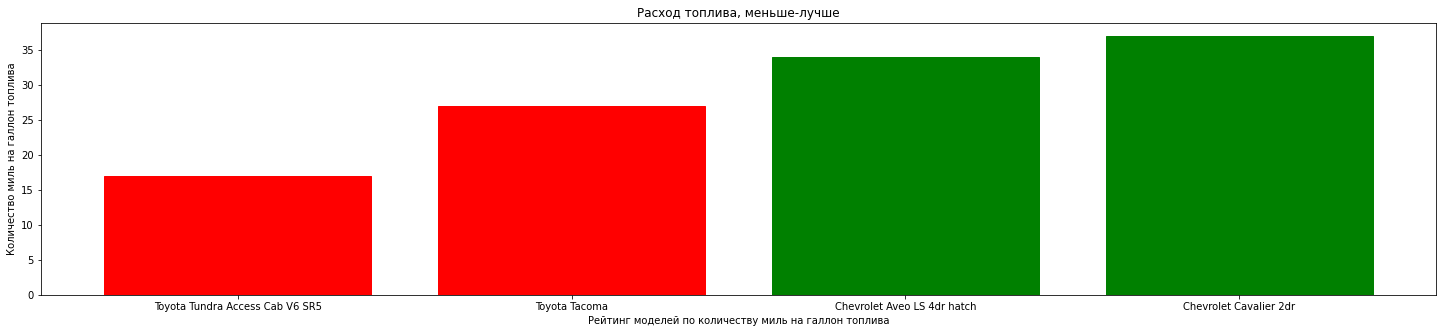

In [38]:
# Тут выбираются именно те модели, которые показывают превосходство одного бренда автомобилей над другим

hwy_mpg = sport_cars['hwy_mpg'].tolist()
hwy_mpg_2 = [hwy_mpg[427], hwy_mpg[425], hwy_mpg[1], hwy_mpg[2],]
names_2 = [name[427], name[425], name[1], name[2]]
fig, ax = plt.subplots(figsize=(25,5))
barlist = plt.bar(names_2, hwy_mpg_2)

barlist[0].set_color('r')
barlist[1].set_color('r')
barlist[2].set_color('g')
barlist[3].set_color('g')

plt.title("Расход топлива, меньше-лучше")
plt.xlabel("Рейтинг моделей по количеству миль на галлон топлива")
plt.ylabel("Количество миль на галлон топлива")

Text(0, 0.5, 'Колёсная база')

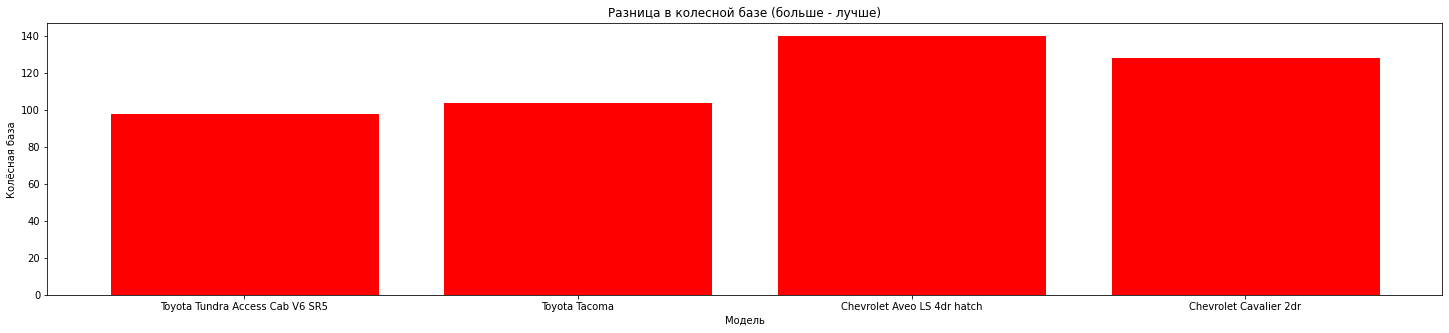

In [39]:
# Значительная разница в колесной базе на графике кажется незначительной
wheel_base = sport_cars['wheel_base'].tolist()
wheel_base_2 = [wheel_base[1], wheel_base[2], wheel_base[423], wheel_base[426]]

name_3 = [name[1], name[2], name[423], name[426]]

fig, ax = plt.subplots(figsize=(25,5))
barlist = plt.bar(names_2, wheel_base_2)

barlist[0].set_color('r')
barlist[1].set_color('r')


barlist[2].set_color('r')
barlist[3].set_color('r')

plt.title("Разница в колесной базе (больше - лучше)")
plt.xlabel("Модель")
plt.ylabel("Колёсная база")

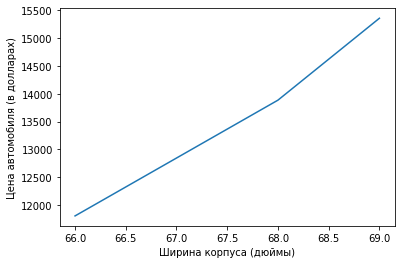

In [40]:
# Несуществующая зависимость между показателями
dealer_cost = sport_cars['dealer_cost'].tolist()
width = sport_cars['width'].tolist()

dealer_cost_2 = [dealer_cost[1], dealer_cost[3], dealer_cost[4]]
width_2 = [width[1], width[3], width[4]]


plt.plot(width_2, dealer_cost_2)
plt.xlabel("Ширина корпуса (дюймы)")
plt.ylabel("Цена автомобиля (в долларах)")
plt.show()

# Рост стоимости автомобиля не может так сильно зависеть от незначительно повышения ширины кузова

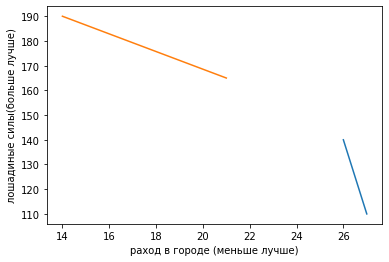

In [41]:

# Чтобы показать превосходство pickup-ов над не-пикапами подбираются конкретные модели
# Исходя из графика можно сделать вывод, что пикапы(оранжевая линия) хуже обычных (синяя линия)
x_1 = [city_mpg[3], city_mpg[2], city_mpg[8]]
y_1 = [horsepwr[3], horsepwr[2], horsepwr[8]]

x_2 = [city_mpg[427], city_mpg[424]]
y_2 = [horsepwr[426], horsepwr[424]]

plt.plot(x_1, y_1)
plt.plot(x_2, y_2)
plt.xlabel("раход в городе (меньше лучше)")
plt.ylabel("лошадиные силы(больше лучше)")
plt.show()



# Правильные графики

(60.0, 150.0)

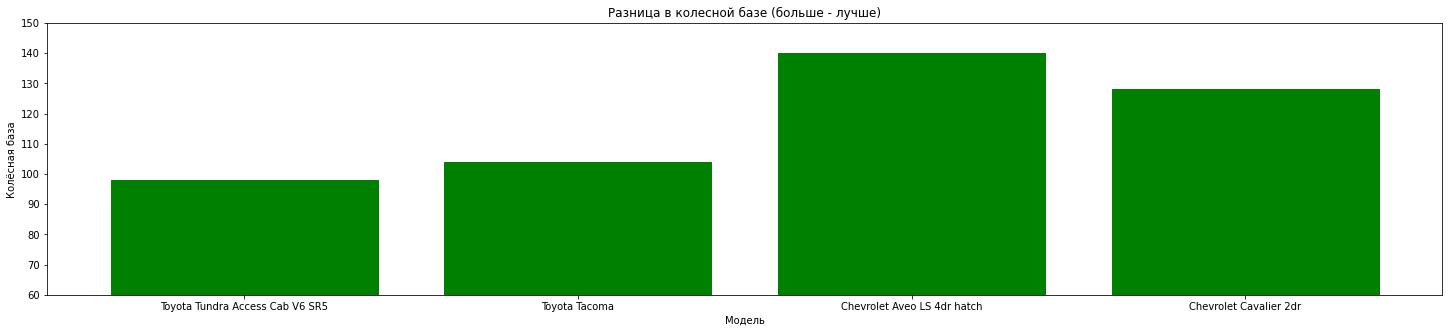

In [42]:
# Правильная разница в колесной базе
wheel_base = sport_cars['wheel_base'].tolist()
wheel_base_2 = [wheel_base[1], wheel_base[2], wheel_base[423], wheel_base[426]]

name_3 = [name[1], name[2], name[423], name[426]]

fig, ax = plt.subplots(figsize=(25,5))
barlist = plt.bar(names_2, wheel_base_2)

barlist[0].set_color('g')
barlist[1].set_color('g')
barlist[2].set_color('g')
barlist[3].set_color('g')

plt.title("Разница в колесной базе (больше - лучше)")
plt.xlabel("Модель")
plt.ylabel("Колёсная база")
plt.ylim(60,150)

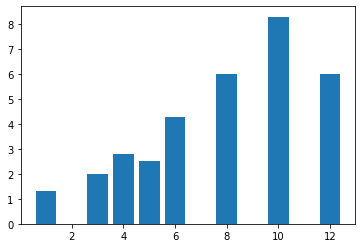

In [43]:
# Зависимость объёма двигателя от количества циллиндров
eng_size_7 = sport_cars['eng_size'].tolist()
ncyl = sport_cars['ncyl'].tolist()
ncyl_2 = []

for i in ncyl:
  if i <= 0:
    i = 1
  ncyl_2.append(i)



barlist = plt.bar(ncyl_2, eng_size_7)

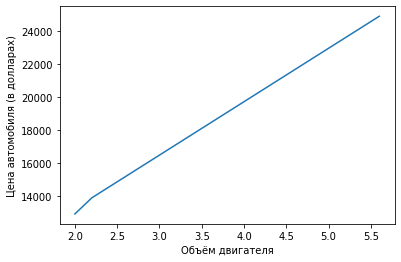

In [44]:
# Зависимость стоимости от объёма двигателя
eng_size = sport_cars['eng_size'].tolist()
eng_size_2 = [eng_size[423], eng_size[3], eng_size[8]]
dealer_cost_3 = [dealer_cost[423], dealer_cost[3], dealer_cost[8]]

plt.plot(eng_size_2, dealer_cost_3)
plt.xlabel("Объём двигателя")
plt.ylabel("Цена автомобиля (в долларах)")
plt.show()

# Цена автомобиля увеличивается при увеличении объёма двигателя

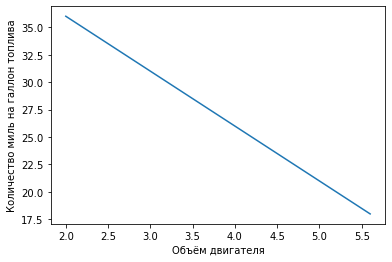

In [45]:
# Зависимость цены автомобиля и расхода топлива
hwy_mpg_5 = [hwy_mpg[423], hwy_mpg[5], hwy_mpg[8]]
eng_size_2 = [eng_size[423], eng_size[5], eng_size[8]]

plt.plot(eng_size_2, hwy_mpg_5)
plt.xlabel("Объём двигателя")
plt.ylabel("Количество миль на галлон топлива")
plt.show()

# По мере увеличения оюъёма двигателя, количество миль, которое он может проехать с одного галлона, снижается